<a href="https://colab.research.google.com/github/CapAgenda/nlpPython/blob/main/advancedNLPwPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download()

In [8]:
import pandas as pd

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
# Drop unused columns and label remaining columns
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label','text']
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Size of the data
messages.shape

(5572, 2)

In [14]:
# What portion of the text are actually spam
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [16]:
# Are we missing any data?
print('Number of nulls in label: {}'.format(messages['label'].isnull().sum()))
print('Number of nulls in label: {}'.format(messages['text'].isnull().sum()))

Number of nulls in label: 0
Number of nulls in label: 0


**NLP: Basics - Implementing a pipeline to clean text**
- PreProcess Text Data
  - Remove Punctuation
  - Tokenization
  - Remove Stopwords

In [18]:
# read in data and clean up columns
import pandas as pd
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label','text']
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [19]:
# What punctuation is included?
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# define a function to remove punctuation in messages
def remove_punc(text):
  text = "".join([char for char in text if char not in string.punctuation])
  return text

messages['text_clean'] = messages['text'].apply(lambda x: remove_punc(x))
messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


**Tokenize**

In [24]:
# define a function to split sentences into a list of words
import re

def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

messages['text_tokenized'] = messages['text_clean'].apply(lambda x: tokenize(x.lower()))
messages.head()

,label,text,text_clean,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


**Remove Stopwords**

In [25]:
# Load the list of stopwords built into nltk
import nltk

stopwords = nltk.corpus.stopwords.words('english')


In [27]:
# Define a function to remove all stopwords

def remove_stopwords(tokenized_text):
  text = [word for word in tokenized_text if word not in stopwords]
  return text

messages['text_nostop'] = messages['text_tokenized'].apply(lambda x: remove_stopwords(x))
messages.head()

,label,text,text_clean,text_tokenized,text_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


**TF-IDF**

In [28]:
# read in data and clean up columns
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label','text']
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [30]:
# combine cleaning functions into one function to clean the data
def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords]
  return text

  

**Apply TfidfVectorizer**

In [32]:
# Fit a basic TFIDF Vectorizer and view the results
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)

X_tfidf = tfidf_vect.fit_transform(messages['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5572, 9395)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# How is the output of the TfidfVectorizer stored?
X_tfidf

<5572x9395 sparse matrix of type '<class 'numpy.float64'>'
	with 50453 stored elements in Compressed Sparse Row format>

**NLP Basics: Building a Random Forest Model on top of vectorized text**

In [34]:
# Read in and clean data
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label','text']

# Clean data function
def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopwords]
  return text

# Convert text to numeric term
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(messages['text'])

X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Explore RandomForestClassifier attributes and hyperparmeters**

In [36]:
# Import Random Forest for classification from sklearn
from sklearn.ensemble import RandomForestClassifier

**Explore RandomForestClassifier on a holdout set**

In [39]:
# Import methods that will be needed to evaluate a basic model
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

In [40]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_features, messages['label'], test_size=0.2) 

In [41]:
# Fit a basic Random Forest Model
rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)

In [42]:
# Make predictions on the test set using the fit model
y_pred = rf_model.predict(x_test)

In [43]:
# Evaluate model predictions using precision and recall
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
print('Precision: {} / Recall: {}'.format(round(precision, 3), round(recall, 3)))

Precision: 1.0 / Recall: 0.84


**word2vec**

In [44]:
# load pretrained word vectors using gensim
import gensim.downloader as api

wiki_embeddings = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [45]:
# Explore the word vector for 'king'
wiki_embeddings['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [46]:
# Find the words most similar to king based on trained word vectors
wiki_embeddings.most_similar('king')

[('prince', 0.7682329416275024),
 ('queen', 0.7507690191268921),
 ('son', 0.7020887136459351),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919990181922913),
 ('kingdom', 0.6811410188674927),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712857484817505),
 ('ii', 0.6676074266433716)]

**Train our own model**

In [47]:
# Read in data and clean up column names
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label','text']
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [48]:
# Clean data using the built in cleaner in gensim
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, until, jurong, point, crazy, available, only, in, bugis, great, world, la, buffet, cine, th..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, in, wkly, comp, to, win, fa, cup, final, tkts, st, may, text, fa, to, to, receive,..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, don, think, he, goes, to, usf, he, lives, around, here, though]"


In [49]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(messages['text_clean'], messages['label'], test_size=0.2)

In [50]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(x_train, size=100, window=5, min_count=2)

In [51]:
# Explore word vector for 'king'
w2v_model.wv['king']

array([-0.01775668,  0.04295659,  0.0128425 , -0.04133036, -0.06301945,
       -0.05109887, -0.04090005, -0.01016673, -0.02183934, -0.00615763,
        0.00015509,  0.02725825, -0.02813783,  0.04544421,  0.01852302,
       -0.05318282,  0.02408787,  0.01697164, -0.0080646 ,  0.04006536,
        0.02089176,  0.016148  , -0.05749246, -0.00279756,  0.03761573,
        0.00723856,  0.07108276,  0.03821681, -0.00835891,  0.03663301,
        0.03397286, -0.02454066,  0.0097391 ,  0.03349525,  0.09984078,
       -0.00118098,  0.03747531, -0.0866603 , -0.02561455, -0.00683781,
       -0.00551599,  0.03311726,  0.00494022, -0.00909238,  0.08399198,
       -0.02312297,  0.03652393, -0.02560348,  0.02474903,  0.04088818,
        0.00367385, -0.00688712,  0.0141053 , -0.03520696,  0.05543699,
       -0.02368023, -0.0113315 ,  0.01994443, -0.03955477, -0.01185544,
       -0.02496555,  0.00533509,  0.00465058, -0.00253745, -0.04820022,
       -0.04923706, -0.05340334, -0.02286342, -0.01710451,  0.02

In [52]:
# Find similar words to king based on word vectors from the trained model
w2v_model.most_similar('king')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('school', 0.9970855116844177),
 ('wine', 0.9970190525054932),
 ('jus', 0.9970046281814575),
 ('latest', 0.996981143951416),
 ('sun', 0.9969738125801086),
 ('texts', 0.9969363212585449),
 ('wk', 0.99692702293396),
 ('book', 0.9969265460968018),
 ('tonight', 0.9969251751899719),
 ('watch', 0.9969182014465332)]

**Prep Word Vectors**

In [53]:
# Generate a list of words the word2vec model learned word vectors for
w2v_model.wv.index2word

['to',
 'you',
 'the',
 'and',
 'is',
 'in',
 'me',
 'my',
 'for',
 'your',
 'it',
 'of',
 'call',
 'that',
 'have',
 'on',
 'now',
 'can',
 'are',
 'so',
 'but',
 'or',
 'not',
 'we',
 'at',
 'get',
 'be',
 'will',
 'do',
 'with',
 'ur',
 'if',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'how',
 'up',
 'ok',
 'from',
 'what',
 'when',
 'out',
 'all',
 'go',
 'free',
 'll',
 'know',
 'good',
 'like',
 'then',
 'day',
 'he',
 'come',
 'am',
 'there',
 'its',
 'got',
 'only',
 'time',
 'was',
 'send',
 'love',
 'text',
 'txt',
 'as',
 'want',
 'she',
 'going',
 'one',
 'still',
 'by',
 'don',
 'stop',
 'home',
 'about',
 'today',
 'sorry',
 'see',
 'need',
 'da',
 'our',
 'hi',
 'lor',
 'back',
 'dont',
 'mobile',
 'her',
 'they',
 'reply',
 'pls',
 'new',
 'please',
 'later',
 'dear',
 'take',
 'oh',
 'where',
 'ì_',
 'tell',
 'any',
 'think',
 'did',
 'phone',
 'here',
 'been',
 're',
 'some',
 'night',
 'week',
 'well',
 'who',
 'happy',
 'has',
 'great',
 'him',
 'hope',
 'claim',
 'much

In [54]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index2word])
  for ls in x_test])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
# Why is the length of the sentence different than the length of the sentence vector?
for i, v in enumerate(w2v_vect):
  print(len(x_test.iloc[i]), len(v))

8 8
11 11
29 26
21 21
18 16
31 26
4 3
59 57
4 4
7 7
21 19
32 29
8 3
42 42
30 29
9 9
27 22
7 7
10 10
7 4
14 12
4 4
27 25
11 9
7 7
15 9
25 24
12 12
20 20
3 3
30 26
5 5
8 8
30 29
6 5
5 5
16 16
12 11
3 3
6 6
6 6
3 3
6 6
13 13
8 7
27 24
7 6
14 14
8 4
23 23
2 2
4 3
9 9
5 5
11 9
7 6
4 4
15 15
14 14
12 12
9 9
10 9
5 5
5 5
7 6
24 21
16 11
6 6
33 29
22 21
12 11
17 16
17 16
8 8
6 6
13 13
9 8
6 5
16 14
13 12
4 3
39 29
23 22
26 20
5 5
13 11
15 13
14 13
5 4
10 9
5 5
18 18
25 23
4 4
18 18
23 23
29 28
5 5
18 18
27 27
8 8
8 6
12 12
4 2
10 9
13 13
17 16
9 9
16 15
10 8
8 8
17 16
5 2
10 9
5 4
25 23
5 5
22 22
15 14
26 26
6 4
10 8
6 4
6 4
13 12
42 40
29 24
4 4
19 16
30 28
3 1
22 21
6 5
20 18
9 9
13 11
8 8
5 5
24 21
3 2
6 6
15 14
29 27
26 24
27 6
4 3
35 35
6 6
22 20
9 9
9 8
9 8
20 17
6 6
5 5
11 11
7 7
17 15
4 2
19 18
12 12
19 17
24 24
18 16
6 5
13 13
5 5
23 23
5 5
5 4
5 5
29 25
17 14
9 6
13 12
3 1
26 25
7 7
12 11
23 22
26 23
21 20
3 3
8 7
6 6
8 8
30 25
26 24
8 8
13 11
4 4
8 8
16 14
19 18
6 6
5 5
19 19
26 24


In [56]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
w2v_vect_avg = []

for vect in w2v_vect:
  if len(vect) != 0:
    w2v_vect_avg.append(vect.mean(axis=0))
  else:
    w2v_vect_avg.append(np.zeros(100))

In [58]:
# Are the sentence vector lengths now consistent?
for i, v in enumerate(w2v_vect_avg):
  print(len(x_test.iloc[i]), len(v))

8 100
11 100
29 100
21 100
18 100
31 100
4 100
59 100
4 100
7 100
21 100
32 100
8 100
42 100
30 100
9 100
27 100
7 100
10 100
7 100
14 100
4 100
27 100
11 100
7 100
15 100
25 100
12 100
20 100
3 100
30 100
5 100
8 100
30 100
6 100
5 100
16 100
12 100
3 100
6 100
6 100
3 100
6 100
13 100
8 100
27 100
7 100
14 100
8 100
23 100
2 100
4 100
9 100
5 100
11 100
7 100
4 100
15 100
14 100
12 100
9 100
10 100
5 100
5 100
7 100
24 100
16 100
6 100
33 100
22 100
12 100
17 100
17 100
8 100
6 100
13 100
9 100
6 100
16 100
13 100
4 100
39 100
23 100
26 100
5 100
13 100
15 100
14 100
5 100
10 100
5 100
18 100
25 100
4 100
18 100
23 100
29 100
5 100
18 100
27 100
8 100
8 100
12 100
4 100
10 100
13 100
17 100
9 100
16 100
10 100
8 100
17 100
5 100
10 100
5 100
25 100
5 100
22 100
15 100
26 100
6 100
10 100
6 100
6 100
13 100
42 100
29 100
4 100
19 100
30 100
3 100
22 100
6 100
20 100
9 100
13 100
8 100
5 100
24 100
3 100
6 100
15 100
29 100
26 100
27 100
4 100
35 100
6 100
22 100
9 100
9 100
9 100
20 1

**doc2vec**
- Train our own model

In [59]:
# Read in data, clean it, and then split it into training and test sets
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label','text']

messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

x_train, x_test, y_train, y_test = train_test_split(messages['text_clean'], messages['label'], test_size=0.2)

In [60]:
from gensim.models.doc2vec import TaggedDocument
#Create tagged document objects to prepare to train the model
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(x_train)]

# Look at what a tagged document looks like
tagged_docs[0]

TaggedDocument(words=['whats', 'that', 'coming', 'over', 'the', 'hill', 'is', 'it', 'monster', 'hope', 'you', 'have', 'great', 'day', 'things', 'going', 'fine', 'here', 'busy', 'though'], tags=[0])

In [62]:
# Train basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [63]:
# what happens if we pass in a single word like we did for word2vec?
d2v_model.infer_vector('text')

# (supposed to give an error asking for a list of strings...)

array([ 0.0044305 ,  0.00489794,  0.00485263, -0.0044615 , -0.00080834,
        0.0002303 , -0.00433774,  0.00442669,  0.00365506,  0.00184055,
        0.00187195,  0.00439348, -0.00045083,  0.0001557 ,  0.00187493,
        0.00454736, -0.00443568, -0.00340105,  0.0045432 , -0.00241277,
       -0.00115797,  0.00410011, -0.00042116,  0.00376219,  0.00399462,
       -0.00011505,  0.00051919, -0.00348514,  0.00233835, -0.00399061,
       -0.00275794, -0.00071689,  0.00105889, -0.00266143, -0.00468437,
        0.00493819,  0.00248739, -0.00021048,  0.00420436, -0.00313506,
       -0.00387822,  0.0011297 ,  0.00274033,  0.00310649,  0.00040024,
        0.00484605,  0.00245139, -0.00471723,  0.00401293,  0.00191022,
       -0.00252511, -0.00293403, -0.00270107,  0.00365091,  0.00097656,
       -0.00438102, -0.0025054 ,  0.00492303, -0.00380009, -0.0036143 ,
        0.00037098,  0.00191277,  0.00121679,  0.00053335,  0.00106107,
        0.0020554 ,  0.00028361,  0.00358183, -0.00350519, -0.00

In [64]:
# what happens if we pass a list of words?
d2v_model.infer_vector(['i','am','learning','nlp'])

array([-4.8574861e-03,  4.1118236e-03, -1.8285617e-04, -6.7512803e-03,
       -8.7023117e-03, -1.1223137e-02, -1.1277439e-02,  2.1078361e-03,
       -5.8271680e-03, -2.4063135e-03,  2.4784653e-04, -1.6103381e-03,
       -1.3733769e-03,  7.4339341e-03,  2.0234995e-03, -4.6166582e-03,
        1.0012009e-02, -4.1667991e-03,  9.4472402e-05,  3.1531150e-03,
        2.9030030e-03,  1.2809505e-03, -9.0651736e-03, -2.2594475e-03,
        4.5512663e-03, -2.1930884e-03,  1.1595478e-02,  4.6711073e-05,
       -4.4836910e-03,  1.5240754e-03,  9.7062811e-03, -7.8054280e-03,
        1.1052311e-03,  8.8415518e-03,  9.9948468e-03,  3.5608171e-03,
        2.5014589e-03, -1.8631531e-02, -5.1447516e-03,  5.6247092e-03,
        7.5010222e-04,  7.3614945e-03,  1.3282122e-03,  1.1440528e-03,
        9.9689178e-03,  2.1052868e-03, -1.4019911e-03, -9.7440062e-03,
        6.8796431e-03,  5.1618358e-03,  3.4693400e-03, -8.9600766e-03,
        3.4270696e-03, -5.2505760e-03,  1.1671540e-02,  4.3720035e-03,
      

**doc2vec: How to prep document vectors for modeling**
- train our own model

In [65]:
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label','text']

messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

x_train, x_test, y_train, y_test = train_test_split(messages['text_clean'], messages['label'], test_size=0.2)

tagged_docs_tr = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(x_train)]

d2v_model = gensim.models.Doc2Vec(tagged_docs_tr,
                                  vector_size=50,
                                  window=2,
                                  min_count=2)


In [66]:
# How do we prepare these vectors to be used in a machine learning model?
vectors = [[d2v_model.infer_vector(words)] for words in x_test]

In [67]:
vectors[0]

[array([-0.05911304,  0.0658723 ,  0.05084184, -0.0497894 , -0.13043073,
        -0.04853834, -0.04708673, -0.01036857, -0.03759352, -0.01451665,
         0.00157879,  0.030844  ,  0.00153261,  0.03657901, -0.02613308,
        -0.07276077,  0.04328601,  0.03555372, -0.00219807,  0.0548471 ,
         0.06601954,  0.00329687, -0.09980273,  0.01678369,  0.04268439,
         0.03711777,  0.10999418,  0.09515759, -0.078439  ,  0.03107094,
         0.02829024, -0.03756531,  0.01358686,  0.06938759,  0.13057895,
         0.00146459,  0.040509  , -0.16957547, -0.06945828,  0.03491845,
        -0.04987179,  0.08995652, -0.01304751, -0.00071702,  0.13626616,
        -0.04539748,  0.08125401, -0.06706437,  0.00566463,  0.06464624],
       dtype=float32)]

**Neural Network / Recurrent Neural Network**
- RNN's: How to implement a basic RNN

In [90]:
# read in data and split into training and test set
# Note: we are not cleaning the data

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ['label','text']
labels = np.where(messages['label'] =='spam', 1, 0)

x_train, x_test, y_train, y_test = train_test_split(messages['text'],
                                                    labels, test_size=0.2)

**Prep Data for Modeling**

In [91]:
# Install keras
# !pip install -U keras
# Import keras tools needed
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [92]:
# Initialize the Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [93]:
# Use that tokenizer to transform the text messages in the training and test sets
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [94]:
x_train_seq[0]

[181, 207, 1016, 1, 110, 50, 284, 2, 169, 198, 297, 165, 1244, 3, 364, 578]

In [95]:
# Pad sequences so each sequence is the same length
x_train_seq_padded = pad_sequences(x_train_seq, 50)
x_test_seq_padded = pad_sequences(x_test_seq, 50)

In [96]:
x_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  181,  207, 1016,    1,  110,   50,  284,    2,  169,  198,
        297,  165, 1244,    3,  364,  578], dtype=int32)

**Build the model**


In [97]:
# import the tools needed from keras and define functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

In [98]:
# Construct a simple RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32)) # layer 1
model.add(LSTM(32, dropout=0, recurrent_dropout=0)) # layer 2
model.add(Dense(32, activation='relu')) # layer 3
model.add(Dense(1, activation='sigmoid')) # layer 4
model.summary() # summary of model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          253600    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 263,009
Trainable params: 263,009
Non-trainable params: 0
_________________________________________________________________


In [99]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [100]:
# Fit the RNN model
history = model.fit(x_train_seq_padded, y_train,
          batch_size=32, epochs=10,
          validation_data=(x_test_seq_padded, y_test))

Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
139/140 [============================>.] - ETA: 0s - loss: 0.2749 - accuracy: 0.9130 - precision_m: 0.4861 - recall_m: 0.4072

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
140/140 [==============================] - 9s 42ms/step - loss: 0.2744 - accuracy: 0.9132 - precision_m: 0.4898 - recall_m: 0.4115 - val_loss: 0.0862 - val_accuracy: 0.9749 - val_precision_m: 0.9400 - val_recall_m: 0.7767
Epoch 2/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0363 - accuracy: 0.9895 - precision_m: 0.9809 - recall_m: 0.9300 - val_loss: 0.0580 - val_accuracy: 0.9821 - val_precision_m: 0.8883 - val_recall_m: 0.8701
Epoch 3/10
140/140 [==============================] - 4s 31ms/step - loss: 0.0120 - accuracy: 0.9973 - precision_m: 0.9893 - recall_m: 0.9789 - val_loss: 0.0712 - val_accuracy: 0.9865 - val_precision_m:

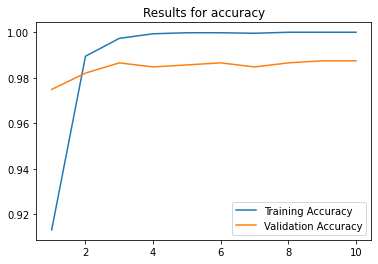

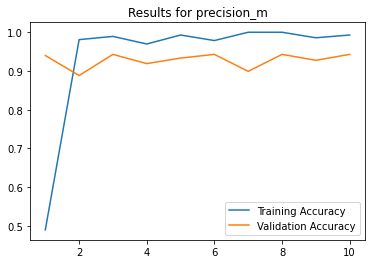

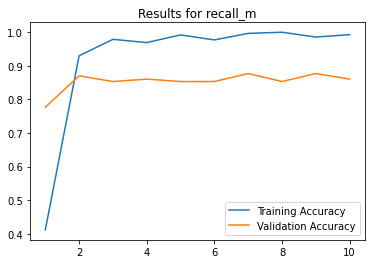

In [101]:
# Plot the evaluation metric by each epoch for the model to see if we are over or underfitting 
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
  acc = history.history[i]
  val_acc = history.history['val_{}'.format(i)]
  epochs = range(1, len(acc) +1)

  plt.figure()
  plt.plot(epochs, acc, label='Training Accuracy')
  plt.plot(epochs, val_acc, label='Validation Accuracy')
  plt.title('Results for {}'.format(i))
  plt.legend()
  plt.show()